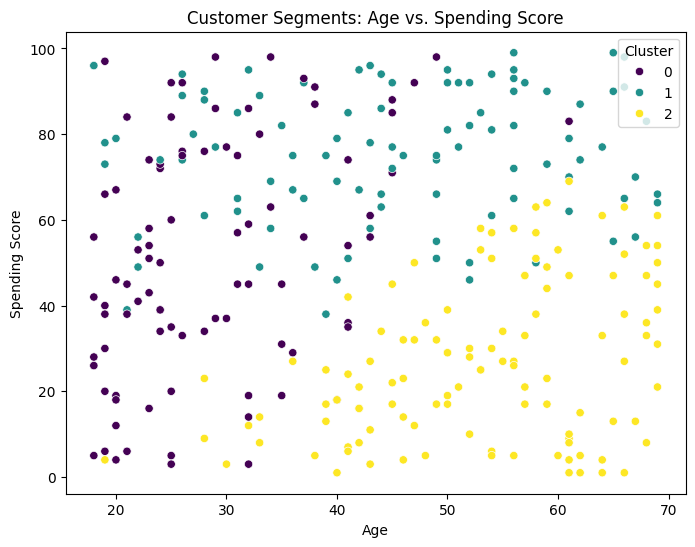

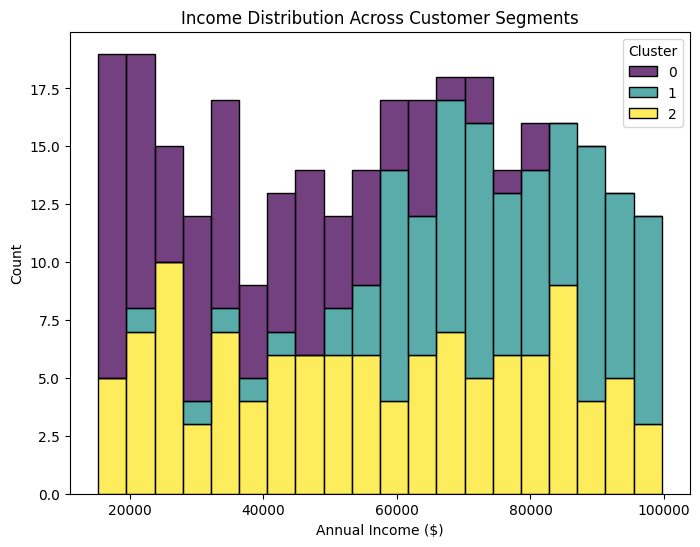

📊 Customer Segment Summary:
               Age  Annual_Income  Spending_Score
Cluster                                          
0        28.545455   38259.715909       50.931818
1        45.134021   74922.319588       75.185567
2        53.095652   56077.260870       26.878261


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("c:/Users/shruthi/Downloads/customer_segmentation.csv")

# Select relevant features for clustering
features = ["Age", "Annual_Income", "Spending_Score"]
df_cluster = df[features]

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

#  **Visualization: Age vs. Spending Score**
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Age"], y=df["Spending_Score"], hue=df["Cluster"], palette="viridis")
plt.title("Customer Segments: Age vs. Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()

#  **Visualization: Income Distribution by Cluster**
plt.figure(figsize=(8, 6))
sns.histplot(df, x="Annual_Income", hue="Cluster", multiple="stack", palette="viridis", bins=20)
plt.title("Income Distribution Across Customer Segments")
plt.xlabel("Annual Income ($)")
plt.ylabel("Count")
plt.show()

#  **Display Cluster Summary**
cluster_summary = df.groupby("Cluster")[features].mean()
print(" Customer Segment Summary:")
print(cluster_summary)
